<img src='https://github.com/LinkedEarth/Logos/raw/master/PYLEOCLIM_logo_HORZ-01.png' width="800">

# Working with LiPD files

## Authors

Deborah Khider

Author1 = {"name": "Deborah Khider", "affiliation": "Information Sciences Institute, University of Southern California", "email": "khider@usc.edu", "orcid": "0000-0001-7501-8430"}

## Preamble

### Goals

- Plot the location of multiple datasets
- Plot the location of the nearest datasets to a record of interest
- Create a LiPDSeries object from LiPD files
- Create Dashboards

**Reading time:**

### Keywords

LiPD; Visualization

### Pre-requisites

None. This tutorial assumes basic knowledge of Python. If you are not familiar with this coding language, check out this [tutorial](http://linked.earth/ec_workshops_py/).

### Relevant Packages

Matplotlib; Cartopy

## Data Description

This tutorial makes use of the following datasets, stored in the [LiPD](https://lipd.net) format: 

* Euro2k database: PAGES2k Consortium., Emile-Geay, J., McKay, N. et al. A global multiproxy database for temperature reconstructions of the Common Era. Sci Data 4, 170088 (2017). https://doi.org/10.1038/sdata.2017.88

* Crystal cave record: McCabe-Glynn, S., Johnson, K., Strong, C. et al. Variable North Pacific influence on drought in southwestern North America since AD 854. Nature Geosci 6, 617–621 (2013). https://doi.org/10.1038/ngeo1862


## Demonstration

Let's import the necessary packages:

In [1]:
import pyleoclim as pyleo
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

### Working with LiPD files

The [`LiPD`](https://pyleoclim-util.readthedocs.io/en/master/core/api.html#lipd-pyleoclim-lipd) object can be used to load datasets stored in the LiPD format. In this first case study, we will load an entire library of LiPD files:

In [2]:
d_euro = pyleo.Lipd('../data/Euro2k')

Disclaimer: LiPD files may be updated and modified to adhere to standards

Found: 31 LiPD file(s)
reading: Ocn-RedSea.Felis.2000.lpd
Error: unable to read metadata file: module 'demjson' has no attribute 'decode_file'
reading: Arc-Forfjorddalen.McCarroll.2013.lpd
Error: unable to read metadata file: module 'demjson' has no attribute 'decode_file'
reading: Eur-Tallinn.Tarand.2001.lpd
Error: unable to read metadata file: module 'demjson' has no attribute 'decode_file'
reading: Eur-CentralEurope.Dobrovoln.2009.lpd
Error: unable to read metadata file: module 'demjson' has no attribute 'decode_file'
reading: Eur-EuropeanAlps.Bntgen.2011.lpd
Error: unable to read metadata file: module 'demjson' has no attribute 'decode_file'
reading: Eur-CentralandEasternPyrenees.Pla.2004.lpd
Error: unable to read metadata file: module 'demjson' has no attribute 'decode_file'
reading: Arc-Tjeggelvas.Bjorklund.2012.lpd
Error: unable to read metadata file: module 'demjson' has no attribute 'decode_file'
readin

To obtain a map of all the dataset locations, arranged by the type of archive, you can use the [`mapAllArchive`](https://pyleoclim-util.readthedocs.io/en/master/core/api.html#pyleoclim.core.lipd.Lipd.mapAllArchive) function:

(<Figure size 432x288 with 1 Axes>, <GeoAxesSubplot:>)

/opt/anaconda3/envs/pyleoenv/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:558: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return matplotlib.axes.Axes.draw(self, renderer=renderer, **kwargs)
/opt/anaconda3/envs/pyleoenv/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:530: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return matplotlib.axes.Axes.get_tightbbox(
/opt/anaconda3/envs/pyleoenv/lib/python3.8/site-packages/IPython/core/pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


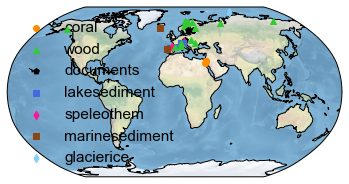

In [5]:
d_euro.mapAllArchive()

To change the projection to center around Europe and place the legend on the right side, one can write the following:

(<Figure size 432x288 with 1 Axes>, <GeoAxesSubplot:>)

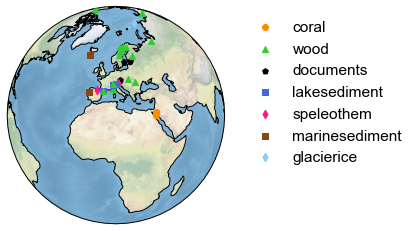

In [6]:
d_euro.mapAllArchive(projection='Orthographic', proj_default={'central_longitude':10, 'central_latitude':30},lgd_kwargs={'bbox_to_anchor':(1.05, 1)})

Note that the `bbox_to_anchor` property is from [Matplotlib](https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html) but can be passed to Pyleoclim to change the behavior of the legend. 

You can also save the figure as such:

In [7]:
d_euro.mapAllArchive(projection='Orthographic', proj_default={'central_longitude':10, 'central_latitude':30},savefig_settings={'path':'map.png','format':'png'})

/Users/alexanderjames/Documents/GitHub/Pyleoclim_util_main/pyleoclim/utils/plotting.py:258: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(path_str, **savefig_args)


Figure saved at: "map.png"


(<Figure size 432x288 with 1 Axes>, <GeoAxesSubplot:>)

### Extracting a LipdSeries

Although working with LiPD objects can be useful for mapping, most of the granularity in routine paleoceanographic studies happens at the individual timeseries level. Next, we will discuss how to obtain a `LipdSeries` from a `Lipd` object in Pyleoclim.

There are several ways to obtain a [`LipdSeries`](https://pyleoclim-util.readthedocs.io/en/master/core/api.html#lipdseries-pyleoclim-lipdseries) from a Lipd object. Each method has its advantages and disadvantages. Let's have a look at all of them.

#### Using Lipd.to_tso

If nothing is known about the content of the file, it may be useful to use the [`Lipd.to_tso`](https://pyleoclim-util.readthedocs.io/en/master/core/api.html#pyleoclim.core.lipd.Lipd.to_tso) method to obtain a list of dictionary that can be iterated upon. Dictionaries are native to Python and can be easily explored as shown below. The first line of the code creates the list of dictionaries while the for loop goes over each dictionary to lift relevant information that would allow us to identify the relevant dictionary for our work and print it out per index:

In [8]:
ts_list = d_euro.to_tso()
for idx, item in enumerate(ts_list):
    print(str(idx)+': '+item['dataSetName']+': '+item['paleoData_variableName'])

extracting paleoData...
extracting: Ocn-RedSea.Felis.2000
extracting: Arc-Forfjorddalen.McCarroll.2013
extracting: Eur-Tallinn.Tarand.2001
extracting: Eur-CentralEurope.Dobrovolný.2009
extracting: Eur-EuropeanAlps.Büntgen.2011
extracting: Eur-CentralandEasternPyrenees.Pla.2004
extracting: Arc-Tjeggelvas.Bjorklund.2012
extracting: Arc-Indigirka.Hughes.1999
extracting: Eur-SpannagelCave.Mangini.2005
extracting: Ocn-AqabaJordanAQ19.Heiss.1999
extracting: Arc-Jamtland.Wilson.2016
extracting: Eur-RAPiD-17-5P.Moffa-Sanchez.2014
extracting: Eur-LakeSilvaplana.Trachsel.2010
extracting: Eur-NorthernSpain.Martín-Chivelet.2011
extracting: Eur-MaritimeFrenchAlps.Büntgen.2012
extracting: Ocn-AqabaJordanAQ18.Heiss.1999
extracting: Arc-Tornetrask.Melvin.2012
extracting: Eur-EasternCarpathianMountains.Popa.2008
extracting: Arc-PolarUrals.Wilson.2015
extracting: Eur-LakeSilvaplana.Larocque-Tobler.2010
extracting: Eur-CoastofPortugal.Abrantes.2011
extracting: Eur-TatraMountains.Büntgen.2013
extracting: 

I am very interested in working with the `temperature` record from `Eur-CoastofPortugal.Abrantes.2011` (record 48 on the list). Remember that Python uses zero-indexing so the first element has index 0. 

You can explore the dictionary as you would normally do in Python. For instance, to get the list of available keys:

In [10]:
ts_list[48].keys()

dict_keys(['mode', 'time_id', '@context', 'archiveType', 'createdBy', 'dataSetName', 'googleDataURL', 'googleMetadataWorksheet', 'googleSpreadSheetKey', 'originalDataURL', 'tagMD5', 'pub1_author', 'pub1_citeKey', 'pub1_dataUrl', 'pub1_issue', 'pub1_journal', 'pub1_pages', 'pub1_publisher', 'pub1_title', 'pub1_type', 'pub1_volume', 'pub1_year', 'pub1_doi', 'pub2_author', 'pub2_Urldate', 'pub2_citeKey', 'pub2_institution', 'pub2_title', 'pub2_type', 'pub2_url', 'geo_type', 'geo_meanLon', 'geo_meanLat', 'geo_meanElev', 'geo_pages2kRegion', 'geo_region', 'geo_siteName', 'lipdVersion', 'tableType', 'paleoData_paleoDataTableName', 'paleoData_paleoDataMD5', 'paleoData_googleWorkSheetKey', 'paleoData_measurementTableName', 'paleoData_measurementTableMD5', 'paleoData_filename', 'paleoData_tableName', 'paleoData_missingValue', 'year', 'yearUnits', 'paleoData_QCCertification', 'paleoData_QCnotes', 'paleoData_TSid', 'paleoData_WDSPaleoUrl', 'paleoData_archiveType', 'paleoData_description', 'paleoD

Let's load this into a `LipdSeries` object:

In [11]:
ts_temp=pyleo.LipdSeries(ts_list[48])

Because `LipdSeries` is a child of `Series`, all the methods applicable to `Series` will work on `LipdSeries` objects. In addition, there are specific methods to `LipdSeries` available that will explore as part of this tutorial.

Alternatively, Pyleoclim also supports passing the entire dictionary (d). In this case, you will be prompted to choose a LipdSeries based on the datasetname and variable name. Essentially, we wrote the for loop above in the Pyleoclim code based so you don't have to but it may be useful for you to create your own loops based on specific keys in your LiPD database.

In [12]:
ts_temp = pyleo.LipdSeries(ts_list)

0 :  Ocn-RedSea.Felis.2000 :  coral :  d18O
1 :  Ocn-RedSea.Felis.2000 :  coral :  year
2 :  Arc-Forfjorddalen.McCarroll.2013 :  tree :  MXD
3 :  Arc-Forfjorddalen.McCarroll.2013 :  tree :  year
4 :  Eur-Tallinn.Tarand.2001 :  documents :  temperature
5 :  Eur-Tallinn.Tarand.2001 :  documents :  year
6 :  Eur-Tallinn.Tarand.2001 :  documents :  JulianDay
7 :  Eur-CentralEurope.Dobrovolný.2009 :  documents :  temperature
8 :  Eur-CentralEurope.Dobrovolný.2009 :  documents :  year
9 :  Eur-EuropeanAlps.Büntgen.2011 :  tree :  trsgi
10 :  Eur-EuropeanAlps.Büntgen.2011 :  tree :  year
11 :  Eur-CentralandEasternPyrenees.Pla.2004 :  lake sediment :  sampleID
12 :  Eur-CentralandEasternPyrenees.Pla.2004 :  lake sediment :  year
13 :  Eur-CentralandEasternPyrenees.Pla.2004 :  lake sediment :  age
14 :  Eur-CentralandEasternPyrenees.Pla.2004 :  lake sediment :  temperature
15 :  Eur-CentralandEasternPyrenees.Pla.2004 :  lake sediment :  uncertainty_temperature
16 :  Arc-Tjeggelvas.Bjorklund.20

Also note that this option requires human interaction at that step.

#### Using `Lipd.to_LipdSeries`

Another option to create a LipdSeries object from a Lipd object is to use the [`Lipd.to_LipdSeries`](https://pyleoclim-util.readthedocs.io/en/master/core/api.html#pyleoclim.core.lipd.Lipd.to_LipdSeries) method. This function can take an optional argument (the index of the series of interest) if it is known. Otherwise, the behavior is equivalent to using a lipd timeseries list.

It is often useful to first run this function without the optional argument when working and to set that argument to share notebooks or after the series of interest has been identified. Note that the number will change if changes to the database are made. 

In [13]:
ts_temp = d_euro.to_LipdSeries()

extracting paleoData...
extracting: Ocn-RedSea.Felis.2000
extracting: Arc-Forfjorddalen.McCarroll.2013
extracting: Eur-Tallinn.Tarand.2001
extracting: Eur-CentralEurope.Dobrovolný.2009
extracting: Eur-EuropeanAlps.Büntgen.2011
extracting: Eur-CentralandEasternPyrenees.Pla.2004
extracting: Arc-Tjeggelvas.Bjorklund.2012
extracting: Arc-Indigirka.Hughes.1999
extracting: Eur-SpannagelCave.Mangini.2005
extracting: Ocn-AqabaJordanAQ19.Heiss.1999
extracting: Arc-Jamtland.Wilson.2016
extracting: Eur-RAPiD-17-5P.Moffa-Sanchez.2014
extracting: Eur-LakeSilvaplana.Trachsel.2010
extracting: Eur-NorthernSpain.Martín-Chivelet.2011
extracting: Eur-MaritimeFrenchAlps.Büntgen.2012
extracting: Ocn-AqabaJordanAQ18.Heiss.1999
extracting: Arc-Tornetrask.Melvin.2012
extracting: Eur-EasternCarpathianMountains.Popa.2008
extracting: Arc-PolarUrals.Wilson.2015
extracting: Eur-LakeSilvaplana.Larocque-Tobler.2010
extracting: Eur-CoastofPortugal.Abrantes.2011
extracting: Eur-TatraMountains.Büntgen.2013
extracting: 

And using the index directly:

In [14]:
ts_temp = d_euro.to_LipdSeries(number = 48)

extracting paleoData...
extracting: Ocn-RedSea.Felis.2000
extracting: Arc-Forfjorddalen.McCarroll.2013
extracting: Eur-Tallinn.Tarand.2001
extracting: Eur-CentralEurope.Dobrovolný.2009
extracting: Eur-EuropeanAlps.Büntgen.2011
extracting: Eur-CentralandEasternPyrenees.Pla.2004
extracting: Arc-Tjeggelvas.Bjorklund.2012
extracting: Arc-Indigirka.Hughes.1999
extracting: Eur-SpannagelCave.Mangini.2005
extracting: Ocn-AqabaJordanAQ19.Heiss.1999
extracting: Arc-Jamtland.Wilson.2016
extracting: Eur-RAPiD-17-5P.Moffa-Sanchez.2014
extracting: Eur-LakeSilvaplana.Trachsel.2010
extracting: Eur-NorthernSpain.Martín-Chivelet.2011
extracting: Eur-MaritimeFrenchAlps.Büntgen.2012
extracting: Ocn-AqabaJordanAQ18.Heiss.1999
extracting: Arc-Tornetrask.Melvin.2012
extracting: Eur-EasternCarpathianMountains.Popa.2008
extracting: Arc-PolarUrals.Wilson.2015
extracting: Eur-LakeSilvaplana.Larocque-Tobler.2010
extracting: Eur-CoastofPortugal.Abrantes.2011
extracting: Eur-TatraMountains.Büntgen.2013
extracting: 

#### Using `Lipd.to_LipdSeriesList`

This method is intended to create a list of potential `LipdSeries` for use with `MultipleSeries`. 

In [15]:
ts_SeriesList = d_euro.to_LipdSeriesList()

extracting paleoData...
extracting: Ocn-RedSea.Felis.2000
extracting: Arc-Forfjorddalen.McCarroll.2013
extracting: Eur-Tallinn.Tarand.2001
extracting: Eur-CentralEurope.Dobrovolný.2009
extracting: Eur-EuropeanAlps.Büntgen.2011
extracting: Eur-CentralandEasternPyrenees.Pla.2004
extracting: Arc-Tjeggelvas.Bjorklund.2012
extracting: Arc-Indigirka.Hughes.1999
extracting: Eur-SpannagelCave.Mangini.2005
extracting: Ocn-AqabaJordanAQ19.Heiss.1999
extracting: Arc-Jamtland.Wilson.2016
extracting: Eur-RAPiD-17-5P.Moffa-Sanchez.2014
extracting: Eur-LakeSilvaplana.Trachsel.2010
extracting: Eur-NorthernSpain.Martín-Chivelet.2011
extracting: Eur-MaritimeFrenchAlps.Büntgen.2012
extracting: Ocn-AqabaJordanAQ18.Heiss.1999
extracting: Arc-Tornetrask.Melvin.2012
extracting: Eur-EasternCarpathianMountains.Popa.2008
extracting: Arc-PolarUrals.Wilson.2015
extracting: Eur-LakeSilvaplana.Larocque-Tobler.2010
extracting: Eur-CoastofPortugal.Abrantes.2011
extracting: Eur-TatraMountains.Büntgen.2013
extracting: 

/Users/alexanderjames/Documents/GitHub/Pyleoclim_util_main/pyleoclim/core/lipd.py:262: UserWarning: The timeseries from 11: Eur-CentralandEasternPyrenees.Pla.2004: sampleID could not be coerced into a LipdSeries object, passing
  warnings.warn(txt)


Note the exception handling here. For a `LipdSeries` (and by extension, `Series`) to be used by most of the functionalities in Pyleoclim, the values should be floats. "sampleID" is most likely a string, and therefore this entry is skipped. 

#### When should I use the various methods?

In short, it depends on what you will be using the objects for afterwards. If you plan to use a [`MulitpleSeries`](https://pyleoclim-util.readthedocs.io/en/master/core/api.html#multipleseries-pyleoclim-multipleseries) object with all of the entries directly, then you should definiely use the `to_LipdSeriesList` method.

If you need to query the resulting dictionaries for specific properties using your own code, then the `to_tso` method makes the most sense. You can then obtain each `LipdSeries` independently (and put them in a list to create a `MultipleSeries` object if needed).

If you don't know exactly what you are looking for but the name of the dataset, archiveType, and variable name are useful to identify the timeseries of interest, then the `to_LipdSeries` is your best bet.

#### Example: Extracting all the coral d18O record from the database

Let's say I'm interested in all the coral d18O record in the database and store them into a MultipleSeries object to create a stack plot. I can proceed in several ways. 

##### Progammatically
For the programmers, it may be easier to use the `to_tso` method, select the correct indices, and create a list of `LipdSeries`. This is just an example on how to manipulate the dictionary object. You can choose any of the available properties to create the filter. 

extracting paleoData...
extracting: Ocn-RedSea.Felis.2000
extracting: Arc-Forfjorddalen.McCarroll.2013
extracting: Eur-Tallinn.Tarand.2001
extracting: Eur-CentralEurope.Dobrovolný.2009
extracting: Eur-EuropeanAlps.Büntgen.2011
extracting: Eur-CentralandEasternPyrenees.Pla.2004
extracting: Arc-Tjeggelvas.Bjorklund.2012
extracting: Arc-Indigirka.Hughes.1999
extracting: Eur-SpannagelCave.Mangini.2005
extracting: Ocn-AqabaJordanAQ19.Heiss.1999
extracting: Arc-Jamtland.Wilson.2016
extracting: Eur-RAPiD-17-5P.Moffa-Sanchez.2014
extracting: Eur-LakeSilvaplana.Trachsel.2010
extracting: Eur-NorthernSpain.Martín-Chivelet.2011
extracting: Eur-MaritimeFrenchAlps.Büntgen.2012
extracting: Ocn-AqabaJordanAQ18.Heiss.1999
extracting: Arc-Tornetrask.Melvin.2012
extracting: Eur-EasternCarpathianMountains.Popa.2008
extracting: Arc-PolarUrals.Wilson.2015
extracting: Eur-LakeSilvaplana.Larocque-Tobler.2010
extracting: Eur-CoastofPortugal.Abrantes.2011
extracting: Eur-TatraMountains.Büntgen.2013
extracting: 

(<Figure size 432x288 with 4 Axes>,
 {0: <Axes:ylabel='d18O [permil]'>,
  1: <Axes:ylabel='d18O [permil]'>,
  2: <Axes:ylabel='d18O [permil]'>,
  3: <Axes:xlabel='Year [AD]'>})

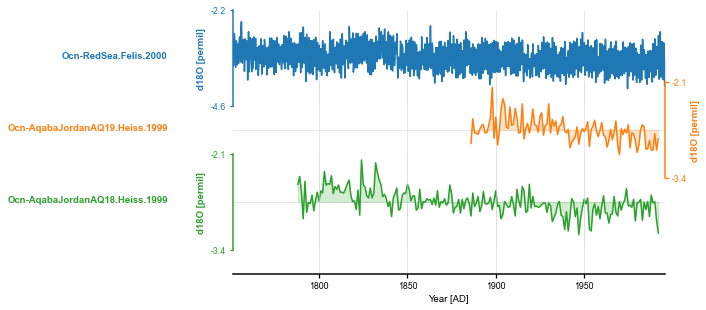

In [16]:
ts_list_euro = d_euro.to_tso()
indices = []
for idx, item in enumerate(ts_list_euro):
    if 'archiveType' in item.keys(): #check that it is available to avoid errors on the loop
        if item['archiveType'] == 'coral': #if it's a coral, then proceed to the next step
            if item['paleoData_variableName'] == 'd18O':
                indices.append(idx)

ts_list_euro_coral =[]

for i in indices:
    ts_list_euro_coral.append(pyleo.LipdSeries(ts_list_euro[i]))

ms_euro_coral = pyleo.MultipleSeries(ts_list_euro_coral)
ms_euro_coral.stackplot()

##### Using prompts

For the beginners, the simplest way is to use the `to_LipdSeries` method once, write down the indices of interest and then create these series one at a time. This can become tedious for a large amount of data, however. For our case, this would look like:

In [19]:
ts1 = d_euro.to_LipdSeries()

extracting paleoData...
extracting: Ocn-RedSea.Felis.2000
extracting: Arc-Forfjorddalen.McCarroll.2013
extracting: Eur-Tallinn.Tarand.2001
extracting: Eur-CentralEurope.Dobrovolný.2009
extracting: Eur-EuropeanAlps.Büntgen.2011
extracting: Eur-CentralandEasternPyrenees.Pla.2004
extracting: Arc-Tjeggelvas.Bjorklund.2012
extracting: Arc-Indigirka.Hughes.1999
extracting: Eur-SpannagelCave.Mangini.2005
extracting: Ocn-AqabaJordanAQ19.Heiss.1999
extracting: Arc-Jamtland.Wilson.2016
extracting: Eur-RAPiD-17-5P.Moffa-Sanchez.2014
extracting: Eur-LakeSilvaplana.Trachsel.2010
extracting: Eur-NorthernSpain.Martín-Chivelet.2011
extracting: Eur-MaritimeFrenchAlps.Büntgen.2012
extracting: Ocn-AqabaJordanAQ18.Heiss.1999
extracting: Arc-Tornetrask.Melvin.2012
extracting: Eur-EasternCarpathianMountains.Popa.2008
extracting: Arc-PolarUrals.Wilson.2015
extracting: Eur-LakeSilvaplana.Larocque-Tobler.2010
extracting: Eur-CoastofPortugal.Abrantes.2011
extracting: Eur-TatraMountains.Büntgen.2013
extracting: 

Here I entered 0 when prompted to create the first `LipdSeries` and wrote down the other indices (22,35) so I can pass them as arguments:

extracting paleoData...
extracting: Ocn-RedSea.Felis.2000
extracting: Arc-Forfjorddalen.McCarroll.2013
extracting: Eur-Tallinn.Tarand.2001
extracting: Eur-CentralEurope.Dobrovolný.2009
extracting: Eur-EuropeanAlps.Büntgen.2011
extracting: Eur-CentralandEasternPyrenees.Pla.2004
extracting: Arc-Tjeggelvas.Bjorklund.2012
extracting: Arc-Indigirka.Hughes.1999
extracting: Eur-SpannagelCave.Mangini.2005
extracting: Ocn-AqabaJordanAQ19.Heiss.1999
extracting: Arc-Jamtland.Wilson.2016
extracting: Eur-RAPiD-17-5P.Moffa-Sanchez.2014
extracting: Eur-LakeSilvaplana.Trachsel.2010
extracting: Eur-NorthernSpain.Martín-Chivelet.2011
extracting: Eur-MaritimeFrenchAlps.Büntgen.2012
extracting: Ocn-AqabaJordanAQ18.Heiss.1999
extracting: Arc-Tornetrask.Melvin.2012
extracting: Eur-EasternCarpathianMountains.Popa.2008
extracting: Arc-PolarUrals.Wilson.2015
extracting: Eur-LakeSilvaplana.Larocque-Tobler.2010
extracting: Eur-CoastofPortugal.Abrantes.2011
extracting: Eur-TatraMountains.Büntgen.2013
extracting: 

(<Figure size 432x288 with 4 Axes>,
 {0: <Axes:ylabel='d18O [permil]'>,
  1: <Axes:ylabel='d18O [permil]'>,
  2: <Axes:ylabel='d18O [permil]'>,
  3: <Axes:xlabel='Year [AD]'>})

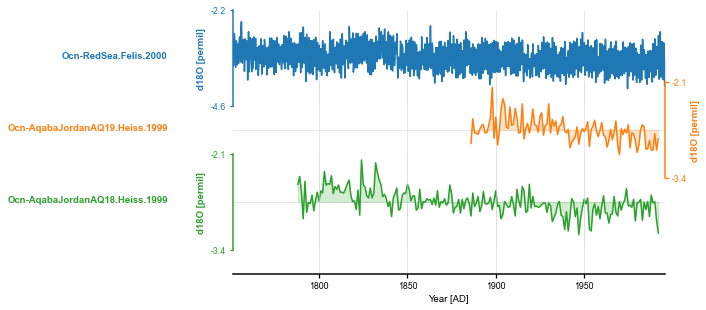

In [20]:
ts2=d_euro.to_LipdSeries(number=22)
ts3=d_euro.to_LipdSeries(number=35)

ms_euro_coral = pyleo.MultipleSeries([ts1,ts2,ts3])
ms_euro_coral.stackplot()

### Working with LipdSeries

Since `LipdSeries` is a child of `Series`, all methods available to `Series` will also apply to `LipdSeries`. In addition, a few other methods are specific to `LipdSeries` that take advantage of the greater availability of metadata

#### Mapping

Let's [map](https://pyleoclim-util.readthedocs.io/en/master/core/api.html#pyleoclim.core.lipdseries.LipdSeries.map) the location of the record from `Eur-CoastofPortugal.Abrantes.2011` that we extracted at the beginning of this tutorial and update the legend to reflect the name of the dataset:

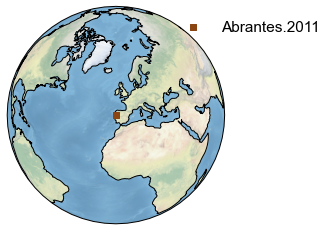

In [21]:
fig,ax = ts_temp.map()
legend_label = 'Abrantes.2011'
current_handles, current_labels = plt.gca().get_legend_handles_labels()
plt.legend(current_handles,[legend_label],bbox_to_anchor=(1.5, 1))

To add the label directly near the point and turn off the legend:

Text(2, 30, 'Abrantes.2011')

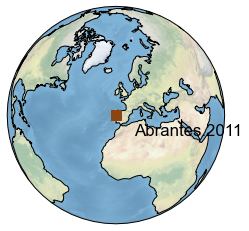

In [22]:
fig,ax = ts_temp.map(markersize = 100, legend=False)
ax.text(2,30,legend_label,transform=ccrs.PlateCarree()) #need to use the transform option for use with cartopy to set the projection for the data, in this case the label.

#### Map records closest to the one of interest

The [`mapNearRecord`](https://pyleoclim-util.readthedocs.io/en/master/core/api.html#pyleoclim.core.lipdseries.LipdSeries.mapNearRecord) method allows to plot the nearest records in a LiPD database.

The method takes an argument, which corresponds to the `Lipd` object from which the `LipdSeries` was extracted from in the first place:

(<Figure size 432x288 with 1 Axes>, <GeoAxesSubplot:>)

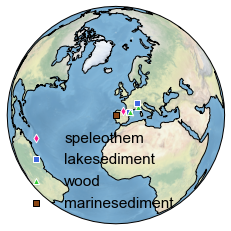

In [23]:
ts_temp.mapNearRecord(D=d_euro)

You can modify the map as we have done previously to move the legend. In addition, the function allows to restrict the number of records, whether they are from the same type of archive, or the distance from the original record. 

#### Dashboard

[Dashboards](https://pyleoclim-util.readthedocs.io/en/master/core/api.html#pyleoclim.core.lipdseries.LipdSeries.dashboard) plot essential information about a `LipdSeries`, making use of various functions applicable to `Series` and `LipdSeries`. Everything is customizable by passing the appropriate arguments to each of the functionalities.

Performing spectral analysis on individual series: 100%|██████████| 1000/1000 [00:03<00:00, 332.93it/s]


(<Figure size 792x576 with 4 Axes>,
 {'ts': <AxesSubplot:xlabel='Year [AD]', ylabel='temperature [degC]'>,
  'dts': <AxesSubplot:xlabel='PDF'>,
  'map': <GeoAxesSubplot:>,
  'spec': <AxesSubplot:xlabel='Period [yrs]', ylabel='PSD'>})

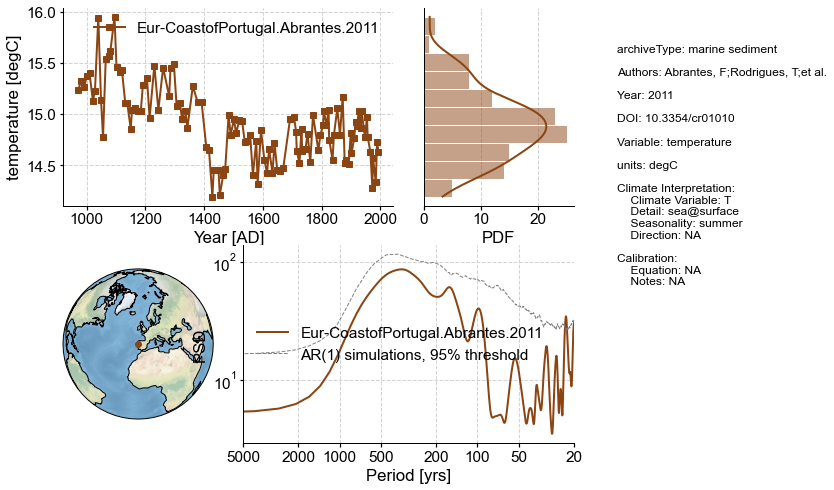

In [24]:
ts_temp.dashboard(spectralsignif_kwargs={'number':1000})

### Working with LiPD records that contain age ensemble information

Pyleoclim makes use of age ensembles for uncertainty quantification. Although the package doesn't contain age modeling software, it is capable of leveraging the output of such software.

Note: Since most age modeling software have an R interface, age modeling for LiPD datasets is handled through the [GeochronR](https://gchron.copernicus.org/articles/3/149/2021/gchron-3-149-2021-discussion.html) package. Note that Jupyter can support R code through Magics so it is possible to use both software using the Jupyter environment.

Let's load a file with such an age model.

In [25]:
d_cave = pyleo.Lipd('../data/Crystal.McCabe-Glynn.2013.lpd')

Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Crystal.McCabe-Glynn.2013.lpd
1.42 MB :That's a big file! This may take a while to load...
Finished read: 1 record


Let's load the d18O record

In [27]:
ts = d_cave.to_LipdSeries()

extracting paleoData...
extracting: Crystal.McCabe-Glynn.2013
Created time series: 3 entries
0 :  Crystal.McCabe-Glynn.2013 :  speleothem :  depth
1 :  Crystal.McCabe-Glynn.2013 :  speleothem :  age
2 :  Crystal.McCabe-Glynn.2013 :  speleothem :  d18o


To attach the age model ensemble, you can used the function [`chronEnsembleToPaleo`](https://pyleoclim-util.readthedocs.io/en/master/core/api.html#pyleoclim.core.lipdseries.LipdSeries.chronEnsembleToPaleo).

Note that this function needs to reference the original `Lipd` object (d_cave, in this case).

In [28]:
ens_cave = ts.chronEnsembleToPaleo(d_cave)

We can now plot the record on this ensemble of ages. Prior to doing this, we need to align these time axes, which we do via [`common_time`](https://pyleoclim-util.readthedocs.io/en/master/core/api.html#pyleoclim.core.multipleseries.MultipleSeries.common_time). You can learn more about how to use `.common_time()` in the `basic_MSES_manipulation.ipynb` tutorial.

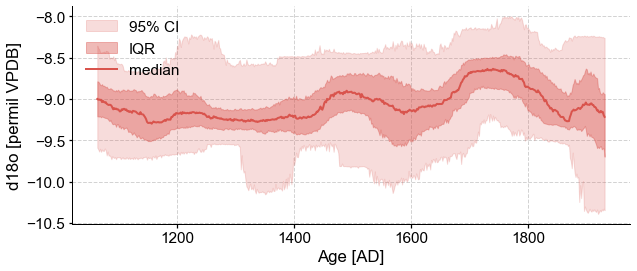

In [30]:
fig,ax=ens_cave.common_time(method='interp').plot_envelope()